In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches
from scipy import signal
import peakutils
import math

In [23]:
precursor_id = 6108

In [24]:
before_df = pd.read_csv('/home/ubuntu/ms1-before-intensity-descent-precursor-{}.csv'.format(precursor_id))
after_df = pd.read_csv('/home/ubuntu/ms1-after-intensity-descent-precursor-{}.csv'.format(precursor_id))

In [25]:
before_df['normalised_intensity'] = before_df.intensity / before_df.intensity.max()
after_df['normalised_intensity'] = after_df.intensity / after_df.intensity.max()

In [26]:
feature_df = pd.read_pickle('/data2/experiments/P3856/precursor-cuboids-3did/exp-P3856-run-P3856_YHE211_1_Slot1-1_1_5104-features-3did.pkl')
feature_df = feature_df[(feature_df.precursor_id == precursor_id)]
feature_df

,monoisotopic_mz,charge,intensity,intensity_full_rt_extent,scan_apex,scan_curve_fit,scan_lower,scan_upper,rt_apex,rt_curve_fit,rt_lower,rt_upper,precursor_id,envelope,feature_id,candidate_phr_error,mono_adjusted,original_phr_error,original_phr,monoisotopic_mass
0,669.327031,2,436459,139341,729.27,True,709.27,749.27,1669.02,True,1665.72,1672.31,6108,"((669.3261, 161377.00), (669.8304, 134719.00),...",610801,13.429967,False,0.162477,0.834809,1336.639463
1,669.682911,3,14697,416,738.62,True,718.62,758.62,1669.87,False,1659.87,1679.87,6108,"((669.6880, 3990.00), (670.0099, 4044.00), (67...",610802,-0.994523,False,-0.064538,1.013534,2006.026832
2,670.113998,1,2467,1097,736.12,False,716.12,756.12,1670.12,False,1660.12,1680.12,6108,"((670.1203, 1808.00), (671.1556, 659.00), (672...",610803,NaN,False,0.021870,0.364491,669.106698


In [27]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

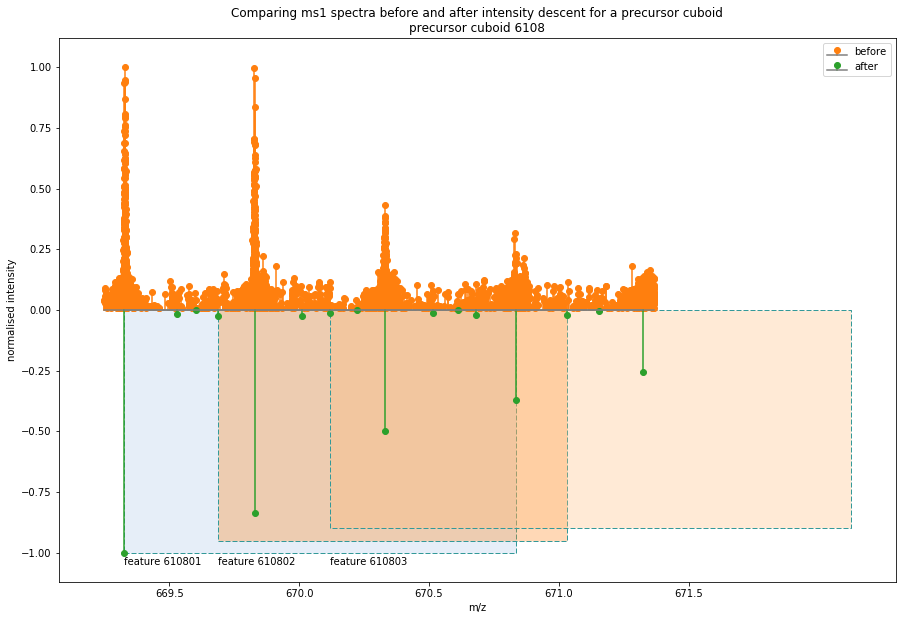

In [28]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(before_df.mz, before_df.normalised_intensity, label='before')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(after_df.mz, -after_df.normalised_intensity, label='after')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)

nearest = 0.5
range_l = round(before_df.mz.min() / nearest) * nearest
range_u = round(before_df.mz.max() / nearest) * nearest
plt.xticks(np.arange(range_l,range_u+nearest,nearest))

for idx,row in enumerate(feature_df.itertuples()):
    envelope = row.envelope
    feature_id = row.feature_id
    env_width = envelope[-1][0] - envelope[0][0]
    rect = patches.Rectangle((envelope[0][0],0),env_width,-1.0+(idx*0.05),linewidth=1,linestyle=(0,(5,2)),edgecolor=(0.2,0.6,0.6,1.0),facecolor=tuple(i/255. for i in tableau20[idx+1])+(0.3,),fill=True)
    ax.add_patch(rect)
    plt.text(envelope[0][0], -1.05, 'feature {}'.format(feature_id))

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms1 spectra before and after intensity descent for a precursor cuboid\nprecursor cuboid {}'.format(precursor_id))
plt.show()